# Análisis del artículo:

#Lightning strike probability and current simulation for simple structures and floating roof tank

[Enlace al artículo](https://https://www.sciencedirect.com/science/article/pii/S1110016821004312?via%3Dihub)



## Fundamentos

Estudiar la probabilidad de impacto por descarga eléctrica en función de la geometría de una estructura para conocer los puntos sensibles y más sujetos a daños, para tomar medidas correctivas de diseño a tiempo, acompañado de implementaciones de sistemas integrados de protección contra rayos en caso de ser necesarios.

Existen múltiples estrategias para conocer las probabilidades de impacto sobre estructuras y al rededor de las mismas, entre las que se destacan los métodos electrogeométricos y de esfera rodante.


Para conocer la **densidad de probabilidad de corriente de impacto** ($PDF$) de una descarga eléctrica atmosférica en un **punto** ($P(x,y,z)$) de la superficie de una construcción de uso cómun, se requieren parámetros geométricos de la misma y parámetros eléctricos / estadísticos de los rayos en la zona de interés:

$$PDF(x,y,z) = f (x,y,z,\xi)$$
Donde $f$ indica una función a ser aplicada a sobre las coordenadas espaciales y parámetros del rayo que es cambiante con la geometría propia del cuerpo a analizar. Cabe observar que esta función $f$ no siempre se podrá obtener de manera analítica y requerirá soportarse en métodos numéricos en función de la complejidad geométrica de la estructura.

Supóngase que se cuenta con un volumen conformado por cierto número de puntos discretos espaciales $X_{i,j,k}$. 

La distancia más corta entre cada punto $X_{i,j,k}$ y la superficie de la estructura $S_{a,b,c}$ conformarán una distancia $r$, con la cual se suma una densidad de probabilidad de impacto para el punto $(a,b,c)$ dado por la ecuación:


$$PDF_{(a,b,c) | (i,j,k)} = 0.1 \frac {e ^{\frac{-\log^2\big(\frac{\big(\frac{r}{10}\big)^\frac{1}{0.65}}{\mu_p}\big)}{2\sigma_p^2}}}{0.65\sqrt{2\pi}r\sigma_p} 
+ 0.9 \frac {e ^{\frac{-\log^2\big(\frac{\big(\frac{r}{10}\big)^\frac{1}{0.65}}{\mu_n}\big)}{2\sigma_p^2}}}{0.65\sqrt{2\pi}r\sigma_n} $$

Donde $r =  || (x_i,y_j,z_k) - (x_a,y_b,z_c) ||$, es decir, que $PDF_{(a,b,c) | (i,j,k)}$ es la densidad de probabilidad de impacto en un punto $(x_a,y_b,z_c)$ de la estructura a causa de un punto $(x_i,y_j,z_k)$ en el espacio volumétrico de la esfera rodante.

Además, $\mu$ representa la media de la distribución de corriente, mientras que $\sigma$ repressenta la desviación estándar. El índice $p$ indica positivo, mientras que el índice $n$ indica descargas de corriente negativa.


Finalmente, se obtendrá la probabilidad total de impacto por cada región discreta de la superficie de la estructura al sumar los aportes de cada punto discreto de la región fuente de descargas:

$$PDF_{(a,b,c)} = \sum_{∀ i,j,k} PDF_{(a,b,c) | (i,j,k)}$$

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact
import time

In [8]:
#Se importa la utilidad elaborada para efectuar la simulación. 
#Disponible en https://github.com/blotero/degm
!git clone https://github.com/blotero/degm

from degm.structure import Structure
from degm.structure import get_pdf_from_r

fatal: destination path 'degm' already exists and is not an empty directory.


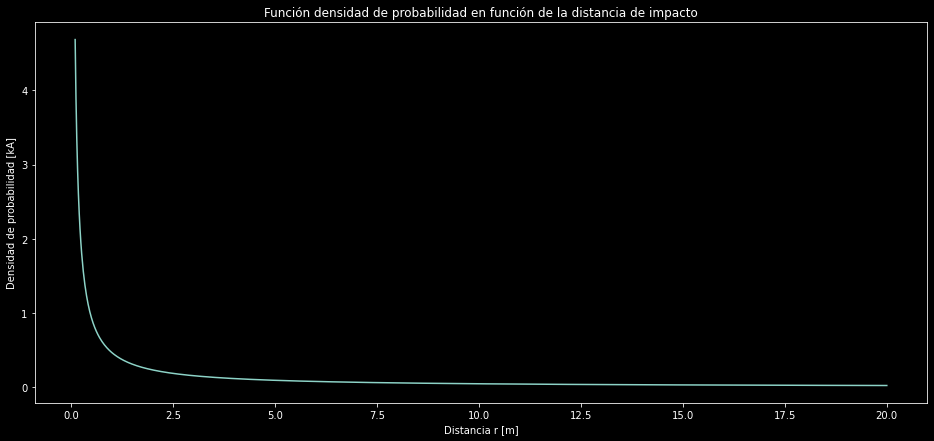

In [9]:
r = np.linspace(0.1,20,1000)

plt.style.use('dark_background')
plt.figure(figsize=(16,7))
plt.plot(r, get_pdf_from_r(r))
plt.title("Función densidad de probabilidad en función de la distancia de impacto")
plt.xlabel("Distancia r [m]")
plt.ylabel("Densidad de probabilidad [kA]")
plt.show()

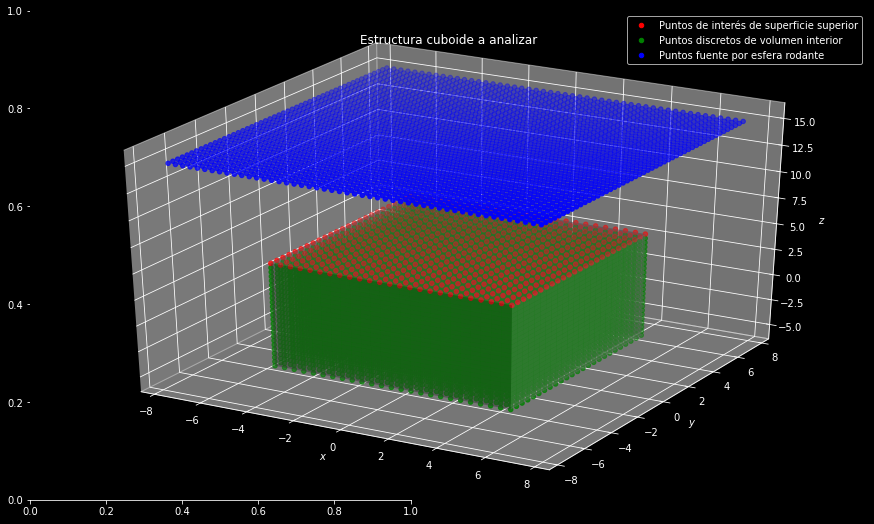

In [10]:
estructura = Structure()
#Visualización de una estructura por defecto:
estructura.build()
estructura.plot_structure()

In [11]:
estructura.calculate_pdf()

Calculando...
Calculado con éxito tras 1562500 iteraciones en 14.514 segundos


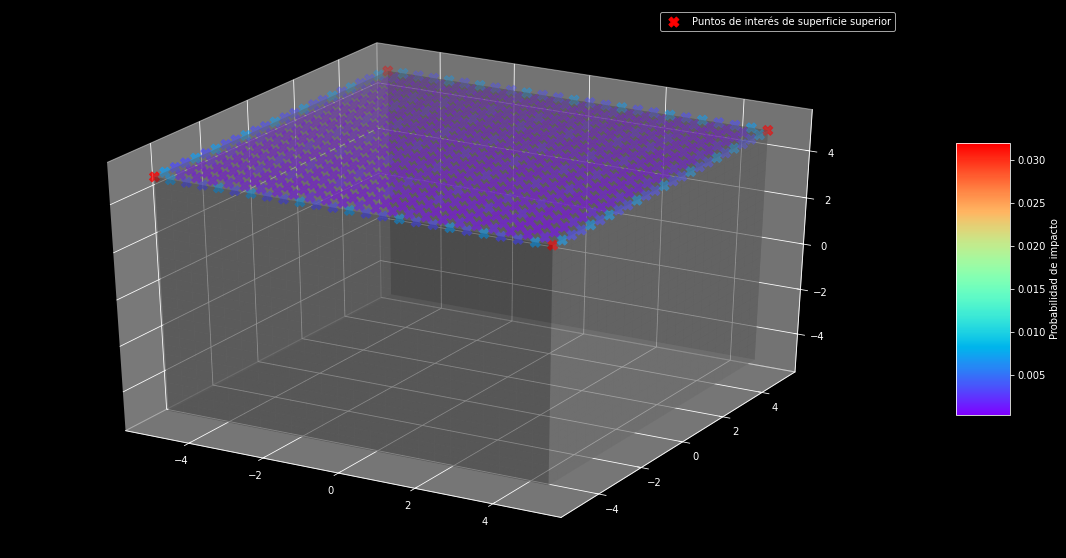

In [12]:
estructura.plot_pdf()